# Given dataset is a binary classification based on problem statement

# EDA and FE

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(32561, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  result          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
## Checking NULL values

data.isnull().sum().sum() # no NULL values are present

0

In [9]:
## Checking unique data

for i in data.columns:
    print(i)
    print(data[i].unique())
    print("====================================================================")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-o

In [10]:
## Separating numerical and categorical features

numerical_features = [col for col in data.columns if data[col].dtype != 'object']
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

In [11]:
## data with numerical features

data[numerical_features]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [12]:
## data with categorical features

data[categorical_features]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,result
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [13]:
### It is been observed that categorical data is having space at the start of the data, which is not readable. So, striping the entire categorical data

for i in categorical_features:
    data[i] = data[i].str.strip()

In [14]:
## replacing result column data, if <=50K with 0 else 1 and its changing the column type to int

data['result'] = ['0' if data['result'][i] == '<=50K' else "1" for i in range(0,len(data['result']))]
data['result'] = data['result'].astype(int)

In [15]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### Filtering the data where workclass,occupation,native-country columns not having the value '?' and removing those data

In [16]:
data = data[(data['workclass']!='?') & (data['occupation']!='?') & (data['native-country']!='?')].reset_index()

In [17]:
data = data.drop(columns=['index'])

In [18]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [19]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30162.0,NaN,NaN,NaN,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0
workclass,30162,7,Private,22286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,30162.0,NaN,NaN,NaN,189793.83393,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education,30162,16,HS-grad,9840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,30162.0,NaN,NaN,NaN,10.121312,2.549995,1.0,9.0,10.0,13.0,16.0
marital-status,30162,7,Married-civ-spouse,14065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30162,14,Prof-specialty,4038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30162,6,Husband,12463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30162,5,White,25933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30162,2,Male,20380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


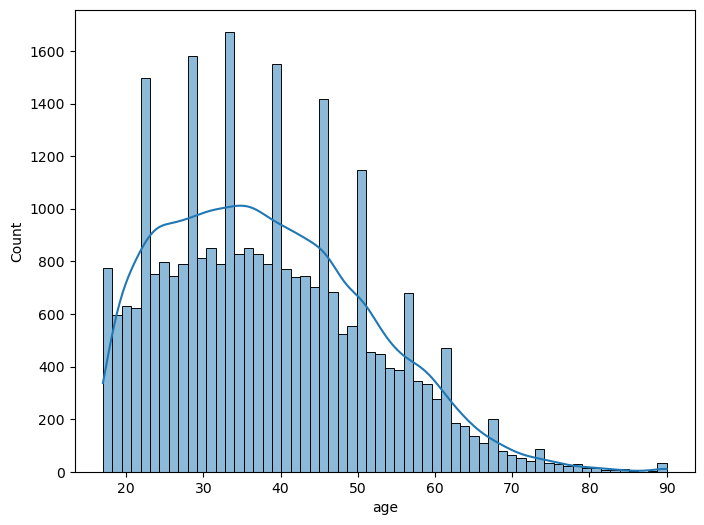

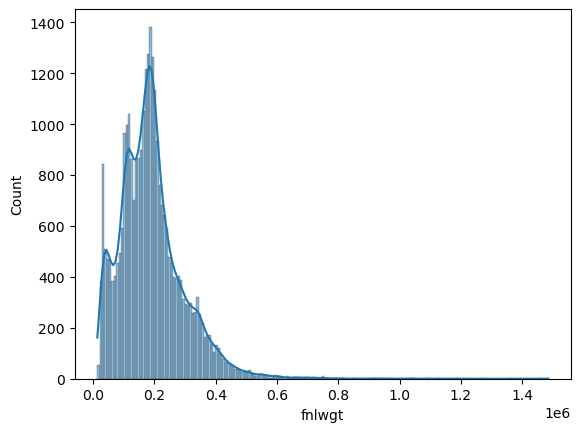

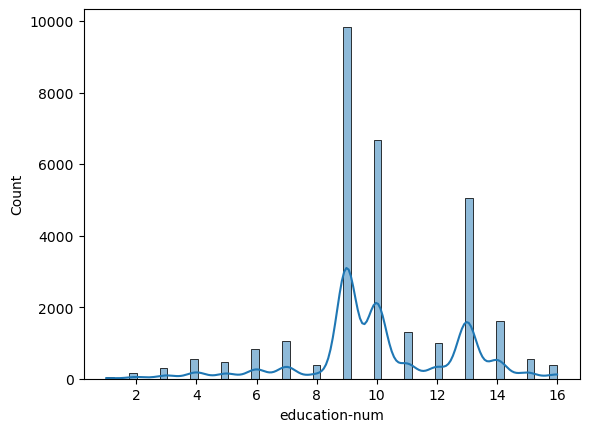

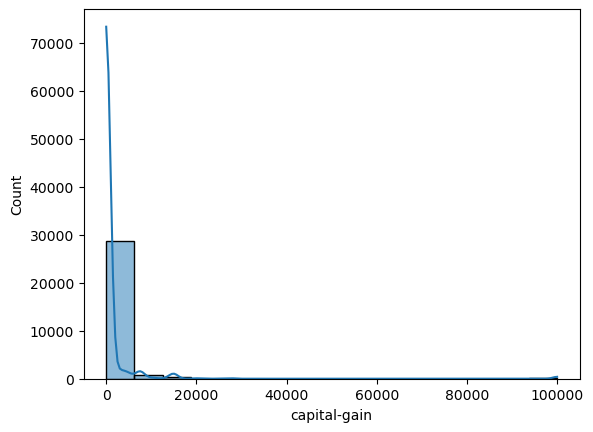

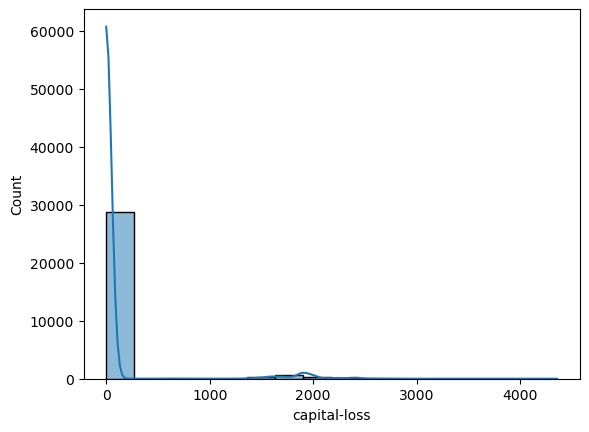

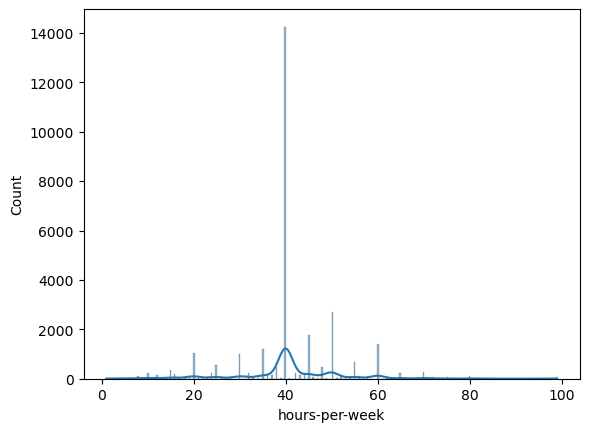

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_features:
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.show()

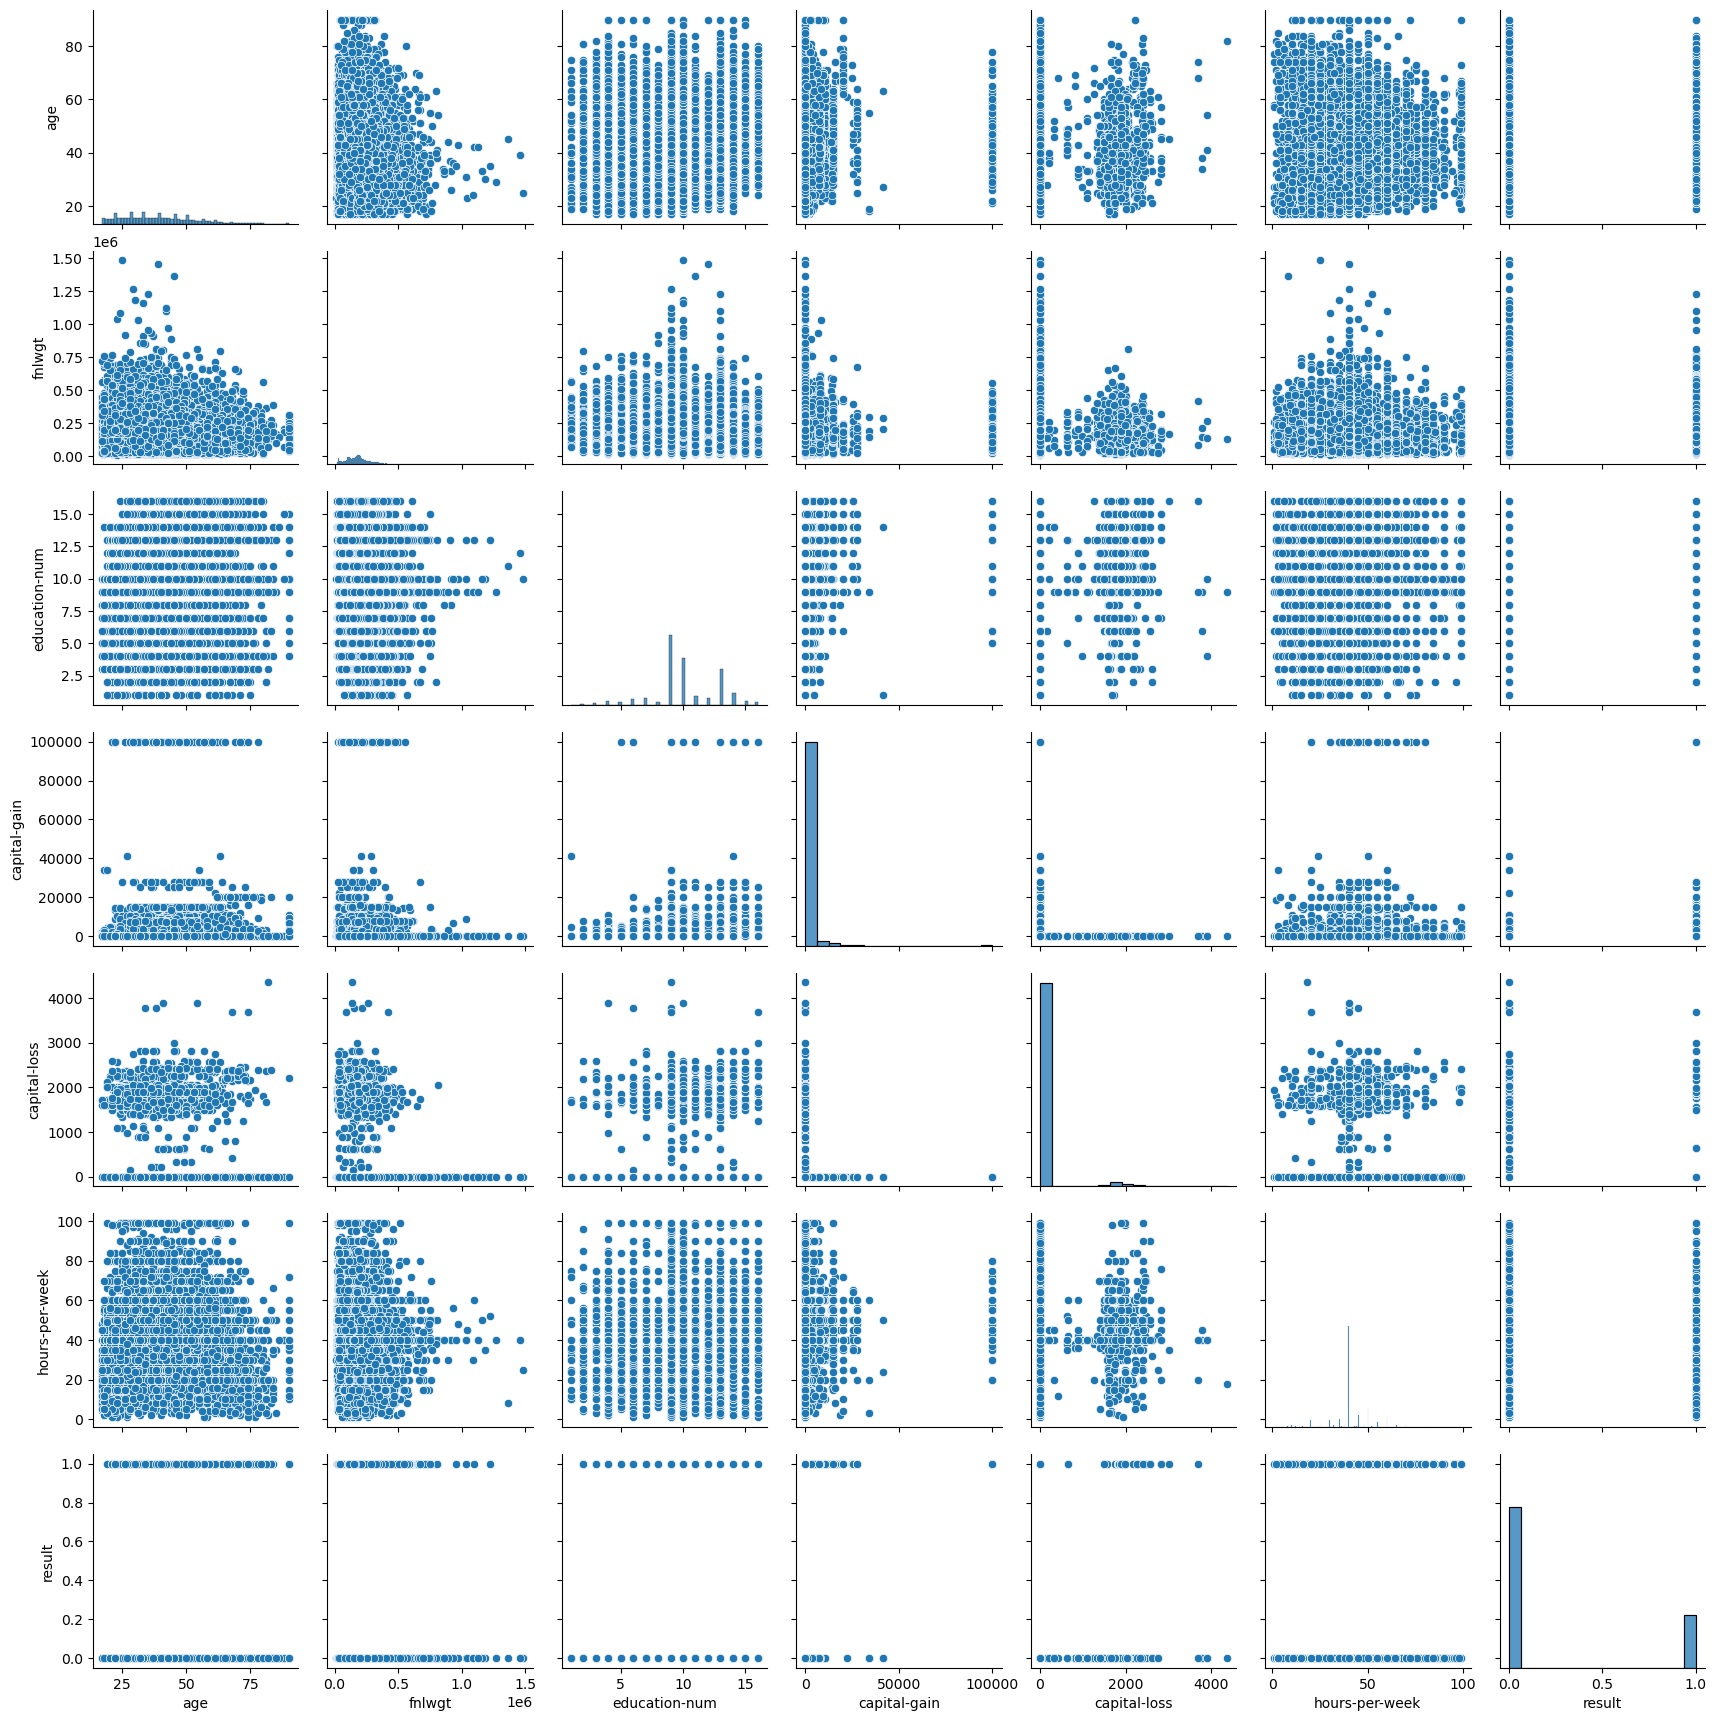

In [21]:
sns.pairplot(data)

<AxesSubplot:>

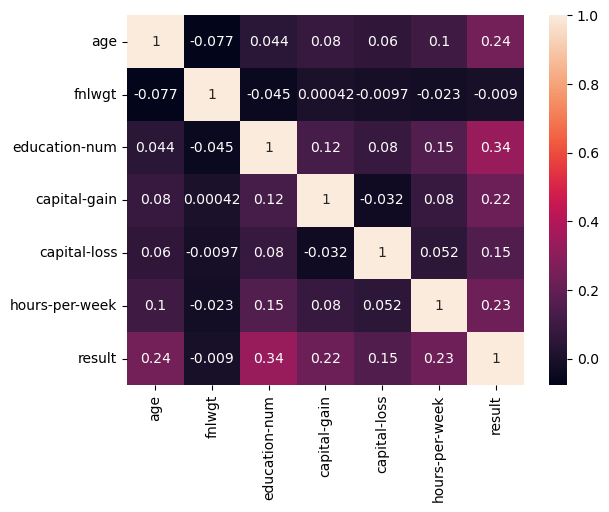

In [22]:
## finding correlation

sns.heatmap(data.corr(),annot=True)

In [23]:
## it is found that fnlwgt column has not heavily influencing the output, removing column fnlwgt

data = data.drop(columns=['fnlwgt'])
numerical_features.remove('fnlwgt')

In [24]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30158,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30159,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30160,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<AxesSubplot:>

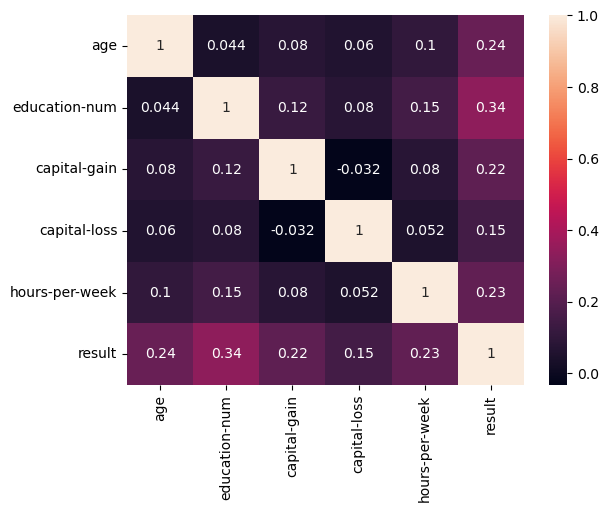

In [25]:
## finding correlation again

sns.heatmap(data.corr(),annot=True)

In [26]:
### Removing duplicates

data = data[~data.duplicated()]
data.shape

(26904, 14)

# Data Transformation

In [27]:
# Define the custom ranking for each ordinal variable

workclass_categories = ["Private","Self-emp-not-inc","Self-emp-inc","Federal-gov","Local-gov","State-gov","Without-pay","Never-worked"]
education_categories = ["Bachelors","Some-college","11th","HS-grad","Prof-school","Assoc-acdm","Assoc-voc","9th","7th-8th","12th","Masters","1st-4th","10th","Doctorate","5th-6th","Preschool"]
marital_status_categories = ["Married-civ-spouse","Divorced","Never-married","Separated","Widowed","Married-spouse-absent","Married-AF-spouse"]
occupation_categories = ["Tech-support","Craft-repair","Other-service","Sales","Exec-managerial","Prof-specialty","Handlers-cleaners","Machine-op-inspct","Adm-clerical","Farming-fishing","Transport-moving","Priv-house-serv","Protective-serv","Armed-Forces"]
relationship_categories = ["Wife","Own-child","Husband","Not-in-family","Other-relative","Unmarried"]
race_categories = ["White","Asian-Pac-Islander","Amer-Indian-Eskimo","Other","Black"]
sex_categories = ["Female","Male"]
native_country_categories = ["United-States","Cambodia","England","Puerto-Rico","Canada","Germany","Outlying-US(Guam-USVI-etc)","India","Japan","Greece","South","China","Cuba","Iran","Honduras","Philippines","Italy","Poland","Jamaica","Vietnam","Mexico","Portugal","Ireland","France","Dominican-Republic","Laos","Ecuador","Taiwan","Haiti","Columbia","Hungary","Guatemala","Nicaragua","Scotland","Thailand","Yugoslavia","El-Salvador","Trinadad&Tobago","Peru","Hong","Holand-Netherlands"]

In [28]:
## Independent and dependent features

X = data.drop(labels=['result'],axis=1)
Y = data[['result']]

In [29]:
## Separating numerical and categorical features

categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

In [30]:
categorical_features,numerical_features

(Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country'],
       dtype='object'),
 Index(['age', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'))

In [31]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=36)

In [32]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [33]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[workclass_categories,education_categories,marital_status_categories,occupation_categories,relationship_categories,race_categories,sex_categories,native_country_categories])),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer(transformers=[
('num_pipeline',num_pipeline,numerical_features),
('cat_pipeline',cat_pipeline,categorical_features)
])#.set_output(transform="pandas")


In [34]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

# Model Training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
model.score(X_train,y_train)

0.8321474086661003

In [39]:
y_pred = model.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.8347373637264618

## Hyperparameter tuning

### GridSearch CV

In [41]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating the GridSearchCV object
model1 = model
logreg_cv = GridSearchCV(model, param_grid, cv = 5)
 
logreg_cv.fit(X_train, y_train)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.8314569702144048


In [42]:
# example of grid searching key hyperparametres for logistic regression with l2 regularization
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# define models and parameters
model1 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','newton-cholesky','saga','sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832024 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.832006 (0.006876) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.832006 (0.006876) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.832006 (0.006876) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.832024 (0.006855) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.832006 (0.006876) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.832006 (0.006876) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.832006 (0.006879) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.832006 (0.006879) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.832006 (0.006879) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.832024 (0.006855) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.832006 (0.006879) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.832024 (0.006858) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.831953 (0.006731) wi

In [43]:
# example of grid searching key hyperparametres for logistic regression with l1 regularization
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# define models and parameters
model2 = LogisticRegression()
solvers = ['saga', 'liblinear']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832059 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.832006 (0.006876) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.831988 (0.006859) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.832006 (0.006876) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.832006 (0.006876) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.832059 (0.006826) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.832059 (0.006831) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.832059 (0.006818) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.832006 (0.006851) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.831086 (0.007141) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.831652 (0.006916) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [44]:
# example of grid searching key hyperparametres for logistic regression with elasticnet regularization
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# define models and parameters
model3 = LogisticRegression(l1_ratio = 0.55)
solvers = ['saga']
penalty = ['elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832024 using {'C': 10, 'penalty': 'elasticnet', 'solver': 'saga'}
0.832006 (0.006876) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
0.832024 (0.006905) with: {'C': 10, 'penalty': 'elasticnet', 'solver': 'saga'}
0.832024 (0.006809) with: {'C': 1.0, 'penalty': 'elasticnet', 'solver': 'saga'}
0.831953 (0.006805) with: {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
0.830661 (0.006830) with: {'C': 0.01, 'penalty': 'elasticnet', 'solver': 'saga'}


### auc-roc score

In [45]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)

score

0.7468398938422857

### Confusion Matrix:

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

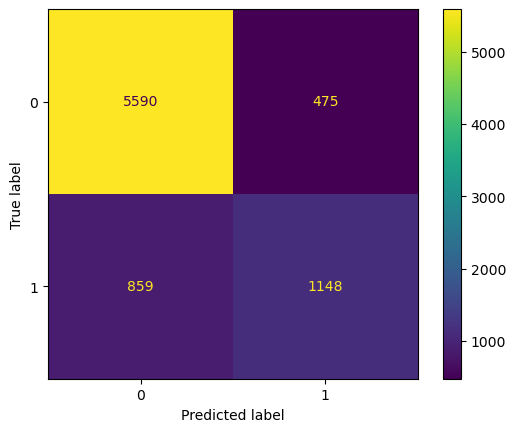

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

## Conclusion

- It is been observed that model has predicted with 0.74 roc_auc_score and most of the results are predicted under True Positive matrix.